In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, plot_roc_curve, RocCurveDisplay, roc_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
 

In [61]:
# Q1
cancer_data = pd.read_csv('data.csv')
cancer_data = cancer_data.loc[:,['diagnosis','radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']]
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,0.11840,0.27760
1,M,20.57,17.77,0.08474,0.07864
2,M,19.69,21.25,0.10960,0.15990
3,M,11.42,20.38,0.14250,0.28390
4,M,20.29,14.34,0.10030,0.13280


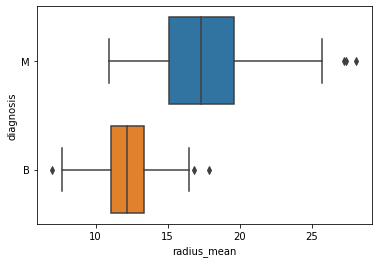

In [62]:
# Q 2.1
radius_plot = sns.boxplot(x="radius_mean", y="diagnosis", data=cancer_data)

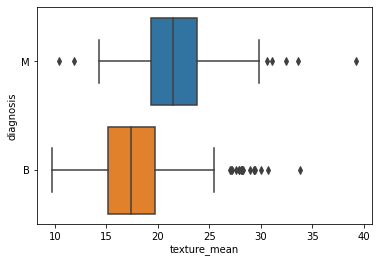

In [63]:
# Q 2.1
texture_plot = sns.boxplot(x="texture_mean", y="diagnosis", data=cancer_data)

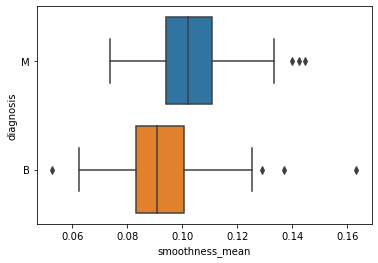

In [64]:
# Q 2.1
smoothness_plot = sns.boxplot(x="smoothness_mean", y="diagnosis", data=cancer_data)

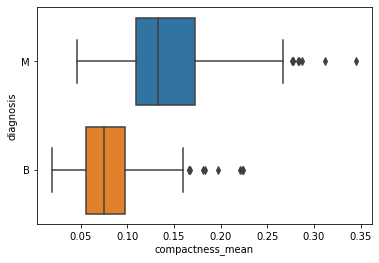

In [65]:
# Q 2.1
compactness_plot = sns.boxplot(x="compactness_mean", y="diagnosis", data=cancer_data)

### Q 2.1
### The radius mean variable will be most accurate in predicting by itself because it has the largest difference in medians between malignant and benign, indicating more predictive power.

In [66]:
# Q 2.2
x_train,x_test,y_train,y_test = train_test_split(cancer_data.loc[:,['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']],cancer_data['diagnosis'],test_size=0.2,random_state=777,stratify=cancer_data['diagnosis'])

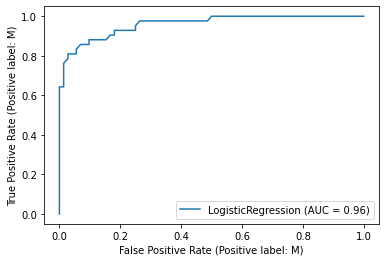

In [67]:
# Q 2.3
model_radius = LogisticRegression()
model_radius = model_radius.fit(x_train.loc[:,'radius_mean'].values.reshape(-1,1),y_train)
plot_roc_curve(model_radius,x_test.loc[:,'radius_mean'].values.reshape(-1,1),y_test.values.reshape(-1,1))


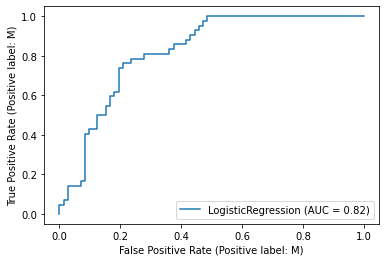

In [68]:
# Q 2.3
model_texture = LogisticRegression()
model_texture = model_texture.fit(x_train.loc[:,'texture_mean'].values.reshape(-1,1),y_train)
plot_roc_curve(model_texture,x_test.loc[:,'texture_mean'].values.reshape(-1,1),y_test.values.reshape(-1,1))

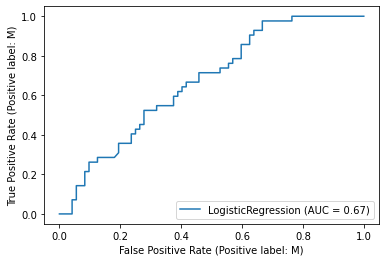

In [69]:
# Q 2.3
model_smoothness = LogisticRegression()
model_smoothness = model_smoothness.fit(x_train.loc[:,'smoothness_mean'].values.reshape(-1,1),y_train)
plot_roc_curve(model_smoothness,x_test.loc[:,'smoothness_mean'].values.reshape(-1,1),y_test.values.reshape(-1,1))

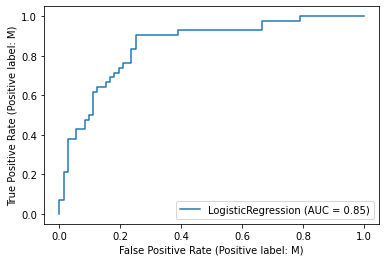

In [70]:
# Q 2.3
model_compactness = LogisticRegression()
model_compactness = model_compactness.fit(x_train.loc[:,'compactness_mean'].values.reshape(-1,1),y_train)
plot_roc_curve(model_compactness,x_test.loc[:,'compactness_mean'].values.reshape(-1,1),y_test.values.reshape(-1,1))

### Q 2.3
### Based on the AUC of the four variables, the most helpful predictor is radius mean with an AUC of 0.96 

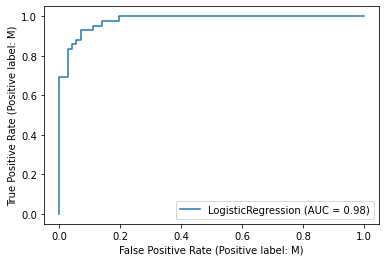

In [71]:
# Q 2.4
model_all = LogisticRegression()
model_all = model_all.fit(x_train,y_train)
plot_roc_curve(model_all,x_test,y_test.values.reshape(-1,1))

In [72]:
# Q 2.4 calculating coefficients 
print(f'The respective coefficients for radius mean, texture mean, smoothness mean and compactness mean are {model_all.coef_}')

The respective coefficients for radius mean, texture mean, smoothness mean and compactness mean are [[0.97723494 0.19242409 0.74181518 2.16548907]]


In [73]:
# Q 2.4 calculating odds ratios and converting to percentage increase
100*(np.exp(model_all.coef_)-1)

array([[165.70990383,  21.21844789, 109.9743471 , 771.88649882]])

### Q 2.4
### Using all variables together improves the performance, as can be seen from the higher AUC of 0.98. Calculating the odds ratios from the coefficients (logit) shows that a one unit increase of radius mean, texture mean, smoothness mean and compactness mean respectively increases the chances of malignancy by about 166%, 21%, 110%, and 772%. This also shows that a one unit increase in compactness mean has the largest impact on chance of malignancy. 

### Q 3.1
### From the plots generated earlier I would expect the radius mean variable to be at the root of the decision tree because of it's higher predictive power as evident in the higher AUC.

In [74]:
# Q 3.2
tree_model_1 = DecisionTreeClassifier(max_depth = 2)
tree_model_1 = tree_model_1.fit(x_train,y_train)
y_pred_1 = tree_model_1.predict(x_test)

tree_model_2 = DecisionTreeClassifier(max_depth = 6)
tree_model_2 = tree_model_2.fit(x_train,y_train)
y_pred_2 = tree_model_2.predict(x_test)



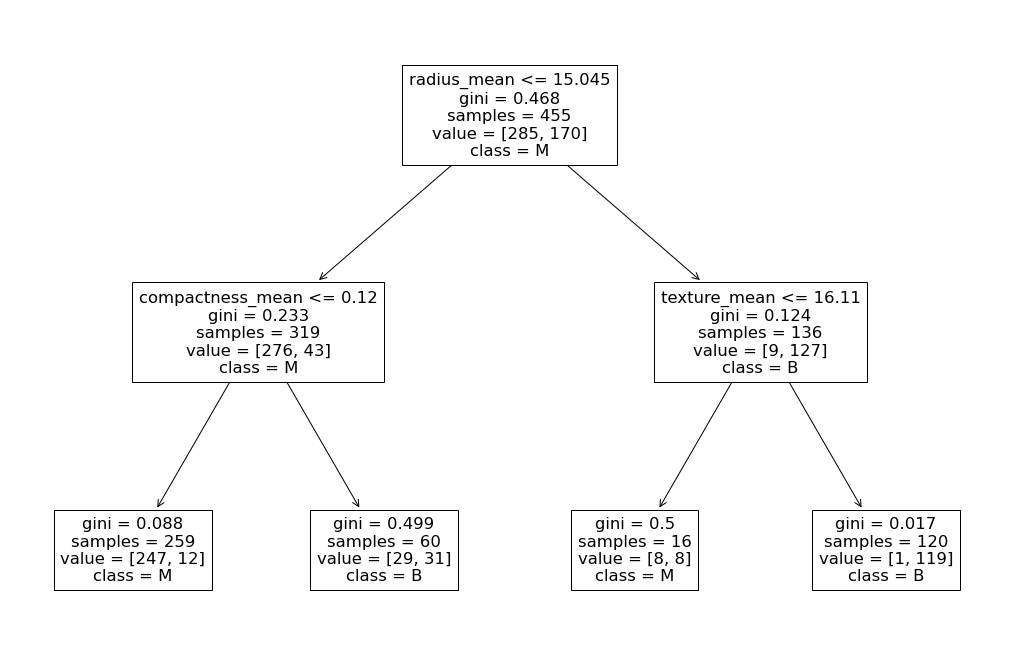

In [75]:
# plotting decision tree for model 1 with max depth of 2
%matplotlib inline
plt.figure(figsize=(18,12))
plot = tree.plot_tree(tree_model_1,feature_names = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean'], 
                      class_names = ['M','B'], max_depth = 2)
plt.show()

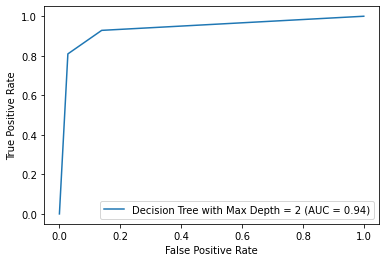

In [76]:
# calculating and plotting ROC curve for model 1
y_score_1 = tree_model_1.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_1[:,1], pos_label= 'M')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
                            estimator_name='Decision Tree with Max Depth = 2')
display.plot()
plt.show()

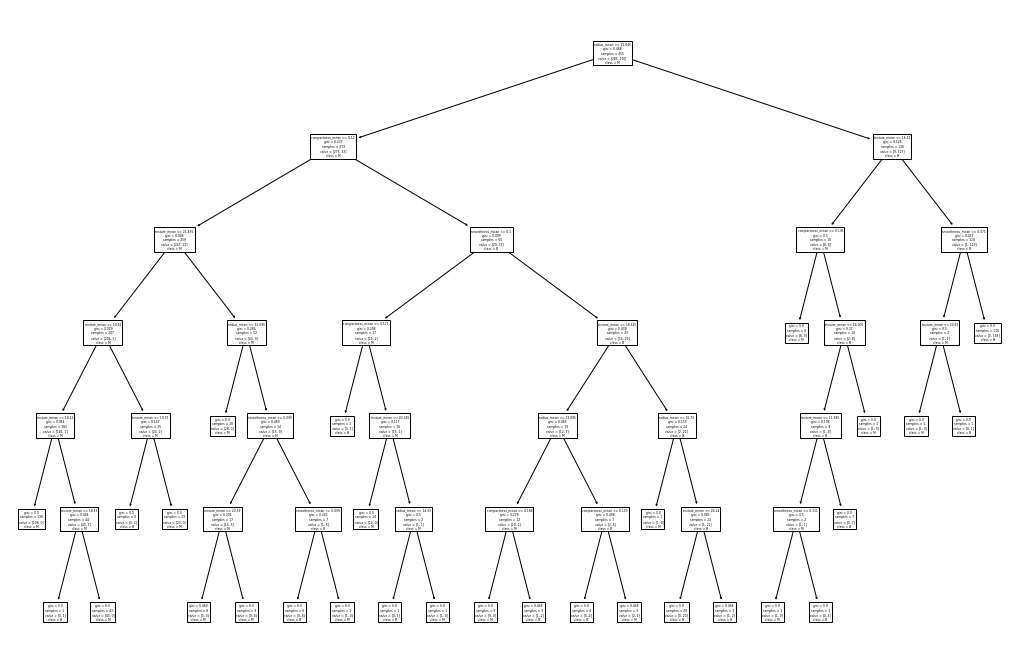

In [77]:
# plotting decision tree for model 2 with max depth of 6
%matplotlib inline
plt.figure(figsize=(18,12))
plot = tree.plot_tree(tree_model_2,feature_names = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean'], 
                      class_names = ['M','B'], max_depth = 6)
plt.show()

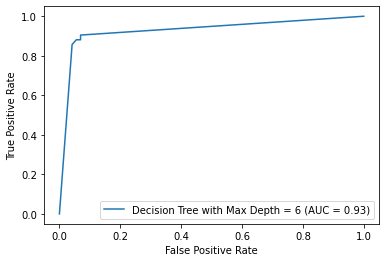

In [78]:
# calculating and plotting ROC curve for model 2
y_score_2 = tree_model_2.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_2[:,1], pos_label= 'M')
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
                            estimator_name='Decision Tree with Max Depth = 6')
display.plot()
plt.show()

### Q 3.3
### The AUC of the tree with max depth 2 calculated against the test set (0.94) is higher than that of the tree with max depth 6 (0.93). This could be indicative of overfitting due to too large of a max depth. 